In [46]:
import pandas as pd
import os
import math
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# statisctics
from statsmodels.tsa.stattools import adfuller

import warnings

# To temporarily suppress all warnings
warnings.filterwarnings("ignore")

### **Construct one dataset with all Algiers cities**

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [18]:
# Set the path to the directory containing your CSV files
directory_path = '/content/drive/MyDrive/Land_use_cover'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file, read it, and append it to the merged_data DataFrame
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    merged_data = merged_data.append(df, ignore_index=True)

merged_data.sort_values(by='date',inplace=True)


In [31]:
merged_data.tail(600)

,date,city,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,label
75739,23-10-11,Sidi M'Hamed,0.058737,0.081263,0.040432,0.035002,0.152427,0.083585,0.353522,0.072150,0.038676,6
57149,23-10-11,Mohammadia,0.058737,0.081263,0.040432,0.035002,0.152427,0.083585,0.353522,0.072150,0.038676,6
21399,23-10-11,Bologhine Ibn Ziri,0.058737,0.081263,0.040432,0.035002,0.152427,0.083585,0.353522,0.072150,0.038676,6
27119,23-10-11,Bourouba,0.058737,0.081263,0.040432,0.035002,0.152427,0.083585,0.353522,0.072150,0.038676,6
51429,23-10-11,Hussein Dey,0.058737,0.081263,0.040432,0.035002,0.152427,0.083585,0.353522,0.072150,0.038676,6
...,...,...,...,...,...,...,...,...,...,...,...,...
45759,23-11-30,El Mouradia,0.059220,0.113998,0.048311,0.035470,0.126078,0.075586,0.345040,0.064801,0.036894,5
44329,23-11-30,El Magharia,0.059220,0.113998,0.048311,0.035470,0.126078,0.075586,0.345040,0.064801,0.036894,5
42899,23-11-30,El Madania,0.059220,0.113998,0.048311,0.035470,0.126078,0.075586,0.345040,0.064801,0.036894,5
58629,23-11-30,Les Eucalyptus,0.059220,0.113998,0.048311,0.035470,0.126078,0.075586,0.345040,0.064801,0.036894,5


### **Drop null rows**

In [24]:
merged_data.dropna(subset=['water','trees','grass','flooded_vegetation','crops','shrub_and_scrub',
                           'bare','snow_and_ice','label','built'],inplace=True)

In [26]:
merged_data.shape

(20440, 12)

## **Save resulting df into csv file**

In [42]:
merged_data.to_csv('algiers_cities_landUse.csv',index=False)

### Label column gives the index of the label with thehighest probability so it must be an int let's round it up and convert it

In [29]:
merged_data['label'] = merged_data['label'].apply(lambda x: math.ceil(x))

# **Descriptive Statistics**

In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20440 entries, 65782 to 80079
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                20440 non-null  object 
 1   city                20440 non-null  object 
 2   water               20440 non-null  float64
 3   trees               20440 non-null  float64
 4   grass               20440 non-null  float64
 5   flooded_vegetation  20440 non-null  float64
 6   crops               20440 non-null  float64
 7   shrub_and_scrub     20440 non-null  float64
 8   built               20440 non-null  float64
 9   bare                20440 non-null  float64
 10  snow_and_ice        20440 non-null  float64
 11  label               20440 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 2.0+ MB


In [34]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
water,20440.0,0.064495,0.038629,0.036706,0.051543,0.058506,0.065322,0.599788
trees,20440.0,0.106487,0.039922,0.029841,0.073428,0.103344,0.129693,0.225263
grass,20440.0,0.056018,0.014519,0.025287,0.044394,0.050384,0.069909,0.093936
flooded_vegetation,20440.0,0.036466,0.004494,0.029220,0.033261,0.035834,0.038593,0.070183
crops,20440.0,0.157935,0.036498,0.032711,0.135762,0.160775,0.182312,0.288942
shrub_and_scrub,20440.0,0.094129,0.027829,0.044723,0.072517,0.091880,0.114131,0.182026
built,20440.0,0.260979,0.066644,0.051135,0.210452,0.244044,0.318845,0.538057
bare,20440.0,0.089332,0.049004,0.040081,0.059333,0.079989,0.104392,0.537269
snow_and_ice,20440.0,0.040823,0.009037,0.033782,0.036649,0.039042,0.041628,0.134804
label,20440.0,5.090411,0.678485,0.000000,5.000000,5.000000,5.000000,8.000000


### Describe what each feature represents

**water**
Estimated probability of complete coverage by water

**trees**
Estimated probability of complete coverage by trees

**grass**
Estimated probability of complete coverage by grass

**flooded_vegetation**
Estimated probability of complete coverage by flooded vegetation

**crops**
Estimated probability of complete coverage by crops

**shrub_and_scrub**
Estimated probability of complete coverage by shrub and scrub

**built**
Estimated probability of complete coverage by built

**bare**
Estimated probability of complete coverage by bare

**snow_and_ice**
Estimated probability of complete coverage by snow and ice

**label**	[0	8	]
Index of the band with the highest estimated probability

# **Duplicate Handling**

In [37]:
# Check duplicates
df.duplicated().sum()

0

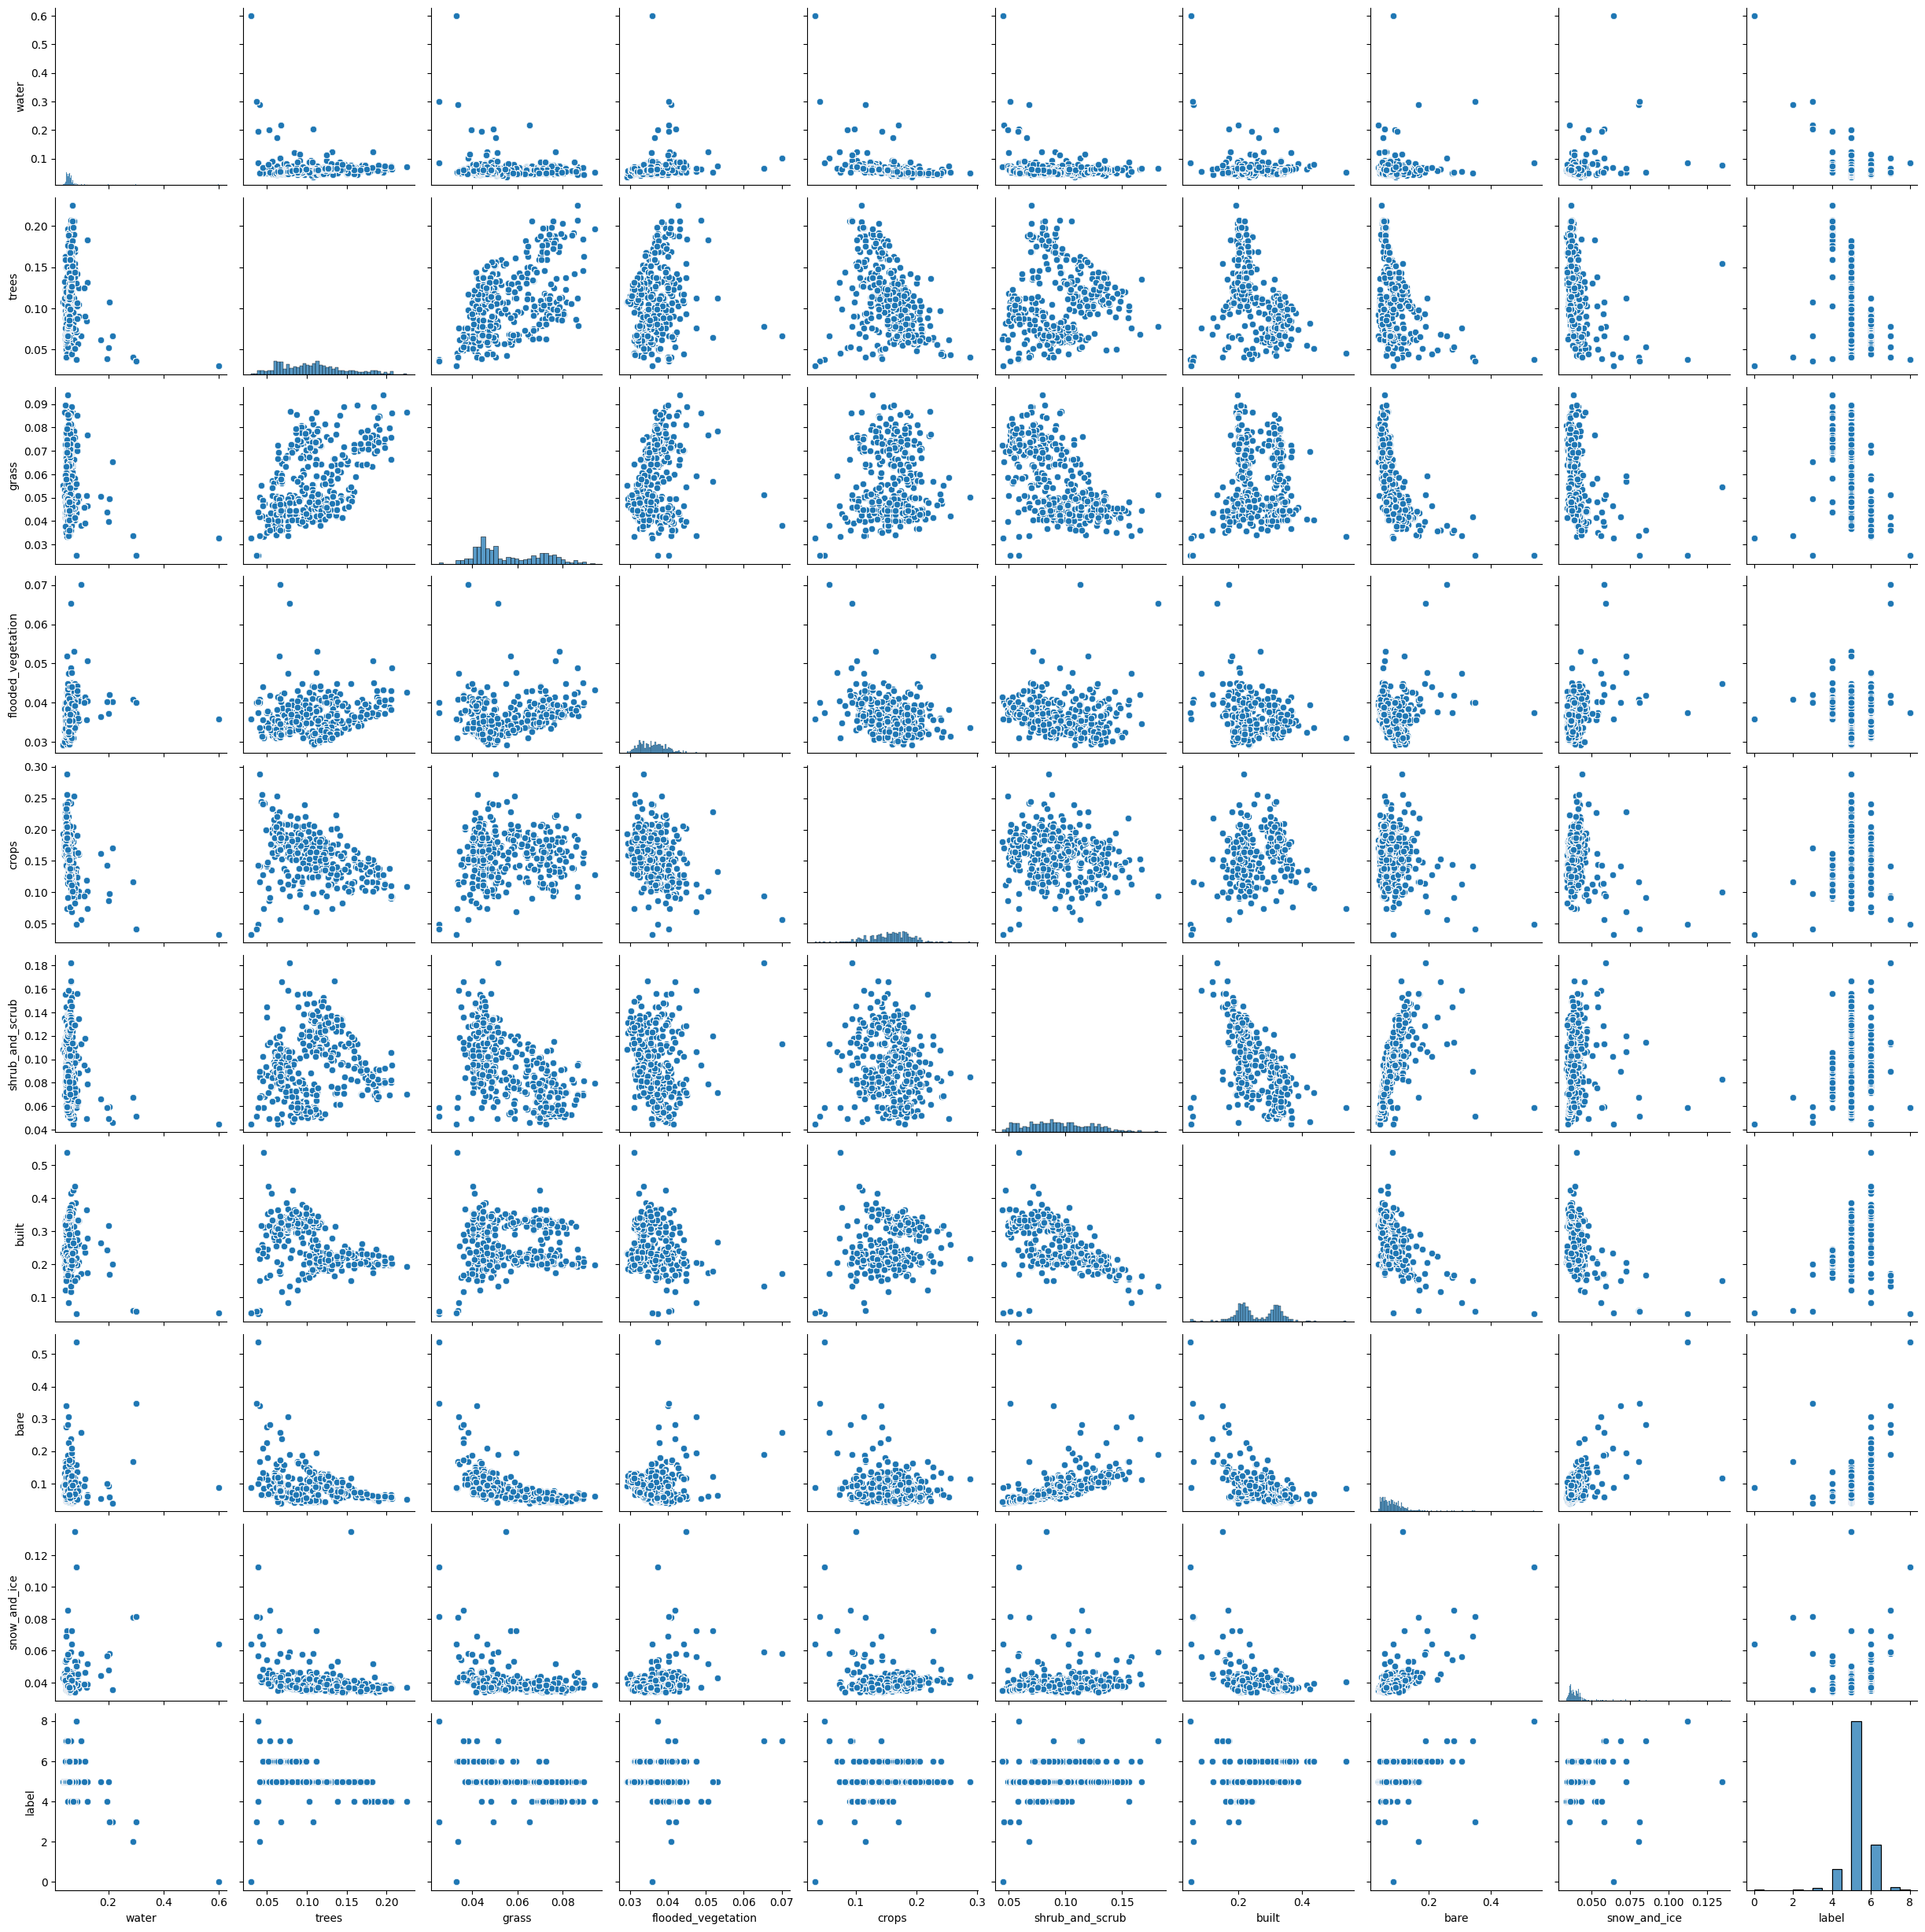

In [36]:
# Check distribution and bivariate
sns.pairplot(merged_data);

We observe a logical correlation between the presence of grass and trees in our dataset. Additionally, it is noteworthy that the label "5" is the most frequently occurring label across the dataset, indicating that shrub_and_scrub vegetation is prevalent throughout Algiers.We also notice a linear relationship between bare and shrub_and_scrub labels which indicates that bare places have  shrub_and_scrub vegetation

## **Univariate analysis**

In [41]:

fig = px.line(merged_data, x="date", y='water', title='distribution of water in algiers cities by time')

# Specify the figure size
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,)

fig.show(renderer="colab")

In [45]:
#unique city names
cities = merged_data['city'].unique()
cities

array(['Rahmania', 'Bab Ezzouar', 'Reghaia', 'El Mouradia', 'Baba Hassen',
       'Kouba', 'Cheraga', 'Tassala El Merdja', 'Bir Khadem', 'Ain Taya',
       'Bains Romains', 'Bouzareah', 'Bourouba', 'Baraki', 'Rais Hamidou',
       'Saoula', 'Bab El Oued', 'Mahelma', 'Ben Aknoun', 'Hamma Anassers',
       'Casbah', 'Djisr Ksentina', 'Les Eucalyptus', 'Bologhine Ibn Ziri',
       'Oued Smar', 'Alger', 'El Marsa', 'Oued Koriche', 'Staoueli',
       'Haraoua', 'Draria', 'El Biar', 'Douera', 'Mohammadia',
       'El Achour', 'Souidania', 'Rouiba', 'Dar El Beida', 'Ouled Chebel',
       'Hydra', 'Bordj El Bahri', 'Khraissia', 'Bordj El Kiffan',
       'Hussein Dey', 'Bir Mourad Rais', 'Bach Djerrah', 'Dely Brahim',
       'Birtouta', 'Beni Messous', "Sidi M'Hamed", 'Sidi Moussa',
       'El Madania', 'Ouled Fayet', 'El Harrach', 'Ain Benian',
       'El Magharia'], dtype=object)

Plot the label per city to get an idea of what each city's land use/coverage is

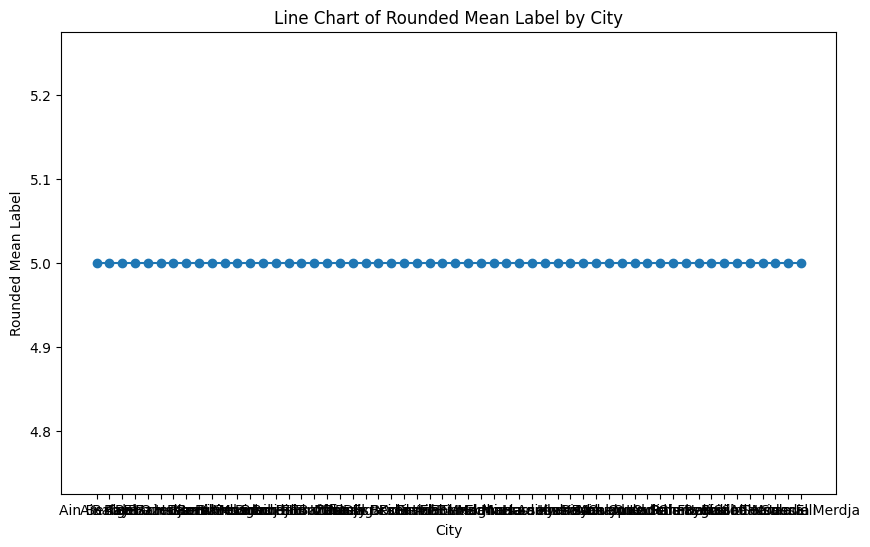

In [61]:
# Calculate the mean of 'label' for each 'city' and round to integer
mean_df = merged_data.groupby('city')['label'].mean().reset_index()
mean_df['label'] = mean_df['label'].round().astype(int)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting a line chart of the rounded mean values
plt.plot(mean_df['city'], mean_df['label'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Rounded Mean Label')
plt.title('Line Chart of Rounded Mean Label by City')

# Display the plot
plt.show()


It seems like this dataset isn't giving any useful information